In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn_extra.cluster import KMedoids # Package to install[pip install scikit-learn-extra]
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('Cereal.csv')
print(data.shape)
data.head()

(77, 16)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [4]:
data.isna().any()

name        False
mfr         False
type        False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo        True
sugars       True
potass       True
vitamins    False
shelf       False
weight      False
cups        False
rating      False
dtype: bool

In [5]:
data = data.dropna(how='any',axis=0) 
data.shape

(74, 16)

In [38]:
x = data.iloc[:,3:]
x.columns

Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

In [39]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

## K-Mean

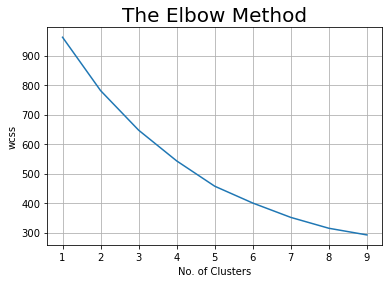

In [40]:
#plt.style.use('fivethirtyeight')
wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_scaled)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

In [41]:
# Cluster Assignment
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x_scaled)
clusters = km.predict(x_scaled)
df = pd.concat([data.reset_index(),pd.DataFrame(clusters,columns = ['clusters']).reset_index()],axis = 1)
df.drop(['index'],axis =1, inplace = True)
print(df['clusters'].value_counts())
df.to_csv('Kmeans.csv',index = False)
df

1    33
2    24
0    17
Name: clusters, dtype: int64


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,clusters
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,2
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,2
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,2
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,1
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,1
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,2
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,2


## K Mediod Clustering

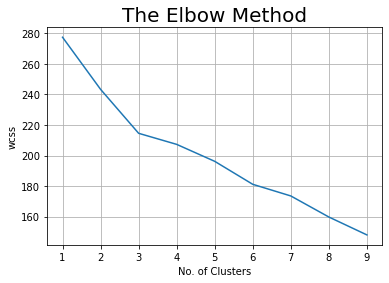

In [42]:
wcss = []
for i in range(1, 10):
    km = KMedoids(n_clusters = i, init = 'k-medoids++', max_iter = 300, random_state = 0)
    km.fit(x_scaled)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

In [43]:
# Cluster Assignment
km = KMedoids(n_clusters = 3, init = 'k-medoids++', max_iter = 300, random_state = 0)
km.fit(x_scaled)
clusters = km.predict(x_scaled)
df = pd.concat([data.reset_index(),pd.DataFrame(clusters,columns = ['clusters']).reset_index()],axis = 1)
df.drop(['index'],axis =1, inplace = True)
print(df['clusters'].value_counts())
df.to_csv('KMedoids.csv',index = False)
df

1    31
2    25
0    18
Name: clusters, dtype: int64


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,clusters
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,1
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,1
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,2
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,1
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,1


## Hierarchical Clustering

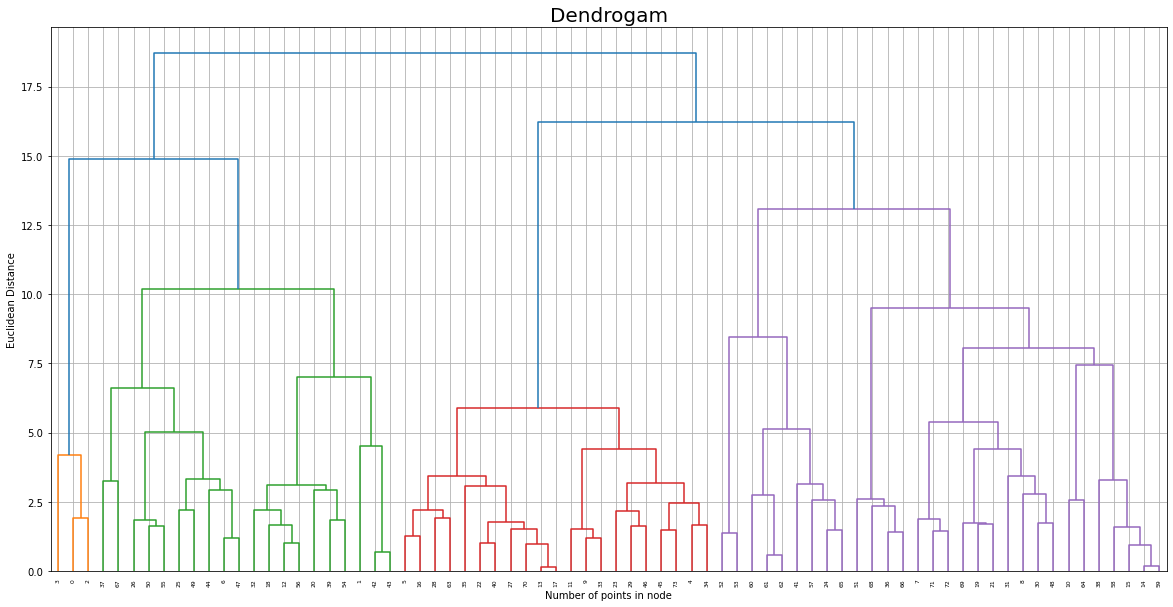

In [44]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(x_scaled, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.ylabel('Euclidean Distance')
plt.xlabel('Number of points in node')
plt.grid()
plt.show()

In [45]:
# CLuster Assignment
clusters = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward').fit_predict(x_scaled)
df = pd.concat([data.reset_index(),pd.DataFrame(clusters,columns = ['clusters']).reset_index()],axis = 1)
df.drop(['index'],axis =1, inplace = True)
print(df['clusters'].value_counts())
df.to_csv('Agglomerative.csv',index = False)
df

0    30
2    21
1    20
3     3
Name: clusters, dtype: int64


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,clusters
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,3
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,1
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,3
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,3
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,0
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,2
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,0
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,0
